<a href="https://colab.research.google.com/github/S1MPL3-416/Facial-categorization-sex-age-race-/blob/main/final%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 15.7 MB 23.9 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
pip install Keras

In [ ]:
import tensorflow
import keras
print(keras.__version__)
print(tensorflow.__version__)

2.3.1
1.15.2


Using TensorFlow backend.


In [ ]:
! pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-ybbts1zq
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-ybbts1zq
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8325 sha256=5ce9e0b1f53944653a98f401c1b92684bbb5979cca50b09a397b7ae92754255a
  Stored in directory: /tmp/pip-ephem-wheel-cache-fk1f8_b7/wheels/08/df/86/0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface


In [ ]:
import tensorflow as tf
#tf.enable_eager_execution()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# code from https://github.com/rcmalli/keras-vggface/blob/master/README.md
# gives error as execuetes

from keras_vggface.vggface import VGGFace

# Based on RESNET50 architecture -> new paper(2017)
vggface = VGGFace(model='resnet50')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


165445632/165439116 [==============================] - 2s 0us/step


In [ ]:
vggface.summary()

In [ ]:
! wget https://img.joinfo.ua/i/2019/01/5c4ea940d2b08.jpg -O brad_pitt.jpg

--2022-02-23 15:51:29--  https://img.joinfo.ua/i/2019/01/5c4ea940d2b08.jpg
Resolving img.joinfo.ua (img.joinfo.ua)... 172.67.214.206, 104.21.83.52, 2606:4700:3035::ac43:d6ce, ...
Connecting to img.joinfo.ua (img.joinfo.ua)|172.67.214.206|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://img.joinfo.com/i/2019/01/5c4ea940d2b08.jpg [following]
--2022-02-23 15:51:30--  https://img.joinfo.com/i/2019/01/5c4ea940d2b08.jpg
Resolving img.joinfo.com (img.joinfo.com)... 172.67.162.235, 104.21.73.131, 2606:4700:3030::ac43:a2eb, ...
Connecting to img.joinfo.com (img.joinfo.com)|172.67.162.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43154 (42K) [image/jpeg]
Saving to: ‘brad_pitt.jpg’

brad_pitt.jpg       100%[===================>]  42.14K  --.-KB/s    in 0s      

2022-02-23 15:51:30 (113 MB/s) - ‘brad_pitt.jpg’ saved [43154/43154]




1351680/1346516 [==============================] - 0s 0us/step


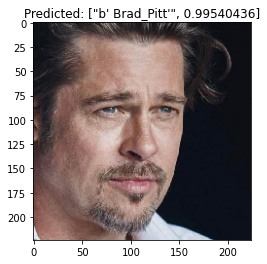

In [ ]:
from keras_vggface import utils
from tensorflow.keras.preprocessing import image

img = image.load_img("brad_pitt.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x = utils.preprocess_input(x, version=2) 

preds = vggface.predict(x) 
plt.title(f"Predicted: {utils.decode_predictions(preds)[0][0]}")
plt.imshow(img)

Data dowload

We made sure that the model was loaded correctly, found out what kind of preprocessing it needs (utils.preprocess_input(x, version=2)) and now we can move on to loading our data.

In [ ]:
from pathlib import Path
from collections import Counter

In [ ]:
data_folder = Path('/content/drive/MyDrive/data science/UTKFace/')

In [ ]:
filenames = list(map(lambda x: x.name, data_folder.glob('*.jpg')))
print(len(filenames))
print(filenames[:3]) # filename contains age, gender and race index, listed with underscores

23708
['56_0_3_20170119174930466.jpg.chip.jpg', '56_0_3_20170119152358239.jpg.chip.jpg', '56_0_3_20170119180731484.jpg.chip.jpg']


In [ ]:
# form a dataframe with paths and required classes
np.random.seed(10)
np.random.shuffle(filenames)
gender_mapping = {0: 'Male', 1: 'Female'}
race_mapping = dict(list(enumerate(('White', 'Black', 'Asian', 'Indian', 'Others'))))
age_labels, gender_labels, race_labels, correct_filenames = [], [], [], []

for filename in filenames:
    if len(filename.split('_')) != 4:
        print(f"Bad filename {filename}")
        continue

    age, gender, race, _ = filename.split('_')
    correct_filenames.append(filename)
    age_labels.append(age)
    gender_labels.append(gender)
    race_labels.append(race)
    
age_labels = np.array(age_labels, dtype=np.float32)
max_age = age_labels.max()
data = {"img_name": correct_filenames, 
        "age": age_labels / max_age, # нормализуем возраст от 0 до 1
        "race": race_labels, 
        "gender": gender_labels}
df = pd.DataFrame(data)
df.head()

Bad filename 61_1_20170109142408075.jpg.chip.jpg
Bad filename 61_1_20170109150557335.jpg.chip.jpg
Bad filename 39_1_20170116174525125.jpg.chip.jpg


,img_name,age,race,gender
0,28_0_1_20170116002343175.jpg.chip.jpg,0.241379,1,0
1,26_1_3_20170117174047894.jpg.chip.jpg,0.224138,3,1
2,36_1_0_20170117135852762.jpg.chip.jpg,0.310345,0,1
3,12_1_4_20170109214232071.jpg.chip.jpg,0.103448,4,1
4,31_1_2_20170104022004181.jpg.chip.jpg,0.267241,2,1


In [ ]:
df_split = pd.read_csv("/content/drive/MyDrive/data science/train_val_split_utk.csv", index_col=0).set_index("img_name")
df_split.head()
df = df.set_index("img_name").join(df_split).reset_index()
df_train = df[df["is_train"] == 1]
df_val = df[df["is_train"] != 1]
print(len(df_val), len(df_train))

In [ ]:
def decode_labels(race_id, gender_id, age):
    return race_mapping[int(race_id)], gender_mapping[int(gender_id)], int(age*max_age)
def show_face(image, race_id, gender_id, age):
    plt.imshow(image)
    race, gender, age = decode_labels(race_id, gender_id, age)
    plt.title(f"Gender: {gender}, Race: {race}, Age: {age}")

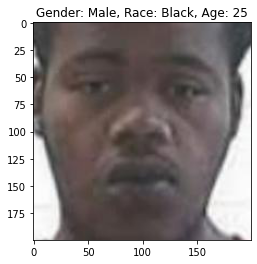

In [ ]:
# Making sure the class labels are correct:
row = df.iloc[np.random.randint(len(df))]
img = plt.imread(str(data_folder / row["img_name"]))
show_face(img, row["race"], row["gender"], row["age"])

Counter({'White': 10078, 'Black': 4526, 'Indian': 3975, 'Asian': 3434, 'Others': 1692})
Counter({'Male': 12391, 'Female': 11314})


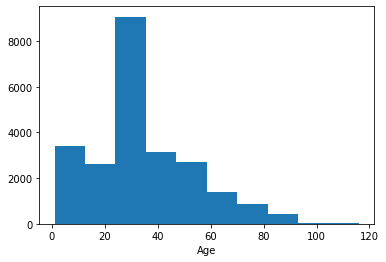

In [ ]:
# check distribuation

races_verbose = [race_mapping[int(race)] for race in df["race"]]
genders_verbose = [gender_mapping[int(gender)] for gender in df["gender"]]
from collections import Counter
print(Counter(races_verbose))
print(Counter(genders_verbose))
_ = plt.hist(df["age"]*max_age)
_ = plt.xlabel("Age")



Building a data generator for a gender prediction model.


Preparation work is complete. We'll start by building a gender prediction model. In this task, we must implement the data generator necessary for the subsequent training of the model. We will use tensorflow.keras.preprocessing.image.ImageDataGenerator


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_input_facenet(image):

    y_array = np.ones([1,224,224,3])
    new_image=np.resize(image, y_array.shape)
    new_image=image 
    preprocessed = utils.preprocess_input(new_image, version=2)

    # preprocessed = utils.preprocess_input(image, version=2)>
    return preprocessed

image_gen = ImageDataGenerator(preprocessing_function=preprocess_input_facenet)



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 64
IMAGE_SIZE = 224

train_generator = image_gen.flow_from_dataframe(df_train,directory=str(data_folder),
                                                x_col="img_name", y_col="gender",
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                batch_size=BATCH_SIZE,shuffle=True,
                                                class_mode='binary')



val_generator = image_gen.flow_from_dataframe(df_val,directory=str(data_folder),
                                                x_col="img_name", y_col="gender",
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                batch_size=BATCH_SIZE,shuffle=False,
                                                class_mode='binary')


Found 18946 validated image filenames belonging to 2 classes.
Found 4759 validated image filenames belonging to 2 classes.


In [ ]:
sample_images, sample_labels = next(val_generator)
assert sample_images.shape == (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3), "Неправильный размер батча"
assert sample_labels.shape == (BATCH_SIZE,), "Неправильный размер меток класса"
assert list(sorted(np.unique(sample_labels))) == [0., 1.], "Ожидаемые классы 0 и 1"
print("Simple tests passed")

Simple tests passed


Let's try to display the image and its label to check the generation:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Female


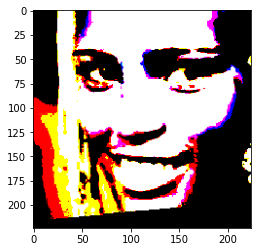

In [ ]:
plt.imshow(sample_images[10])
print(gender_mapping[int(sample_labels[10])])

# matplotlib expects a picture with intensities from 0 to 1 if it's a float and from 0 to 255 if it's an int.

In [ ]:
print(sample_images[10].max(), sample_images[10].min()) # we can see that the brightness values ​​of the float type and negative

151.5047 -131.0912


In [ ]:
sample_images[10].shape

(224, 224, 3)

Male


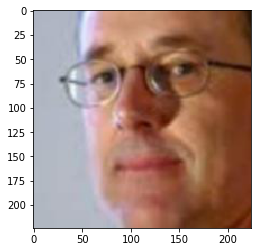

In [ ]:
def deprocess_image(vggface_image):
    image = np.copy(vggface_image)
    image[..., 0] += 91.4953
    image[..., 1] += 103.8827
    image[..., 2] += 131.0912
    image = image[..., ::-1]
    # image =np.array(image, dtype=np.integer)
    image =image.astype(np.uint8)

    return image

plt.imshow(deprocess_image(sample_images[8]))
print(gender_mapping[int(sample_labels[8])])

**Genger prediction model training**

In [ ]:
from tensorflow.keras.models import load_model
vggface_model = load_model("/content/drive/MyDrive/data science/resnet50face.h5")

In [ ]:

# first, lets extract the last layer of the classifier from vggface model
# now base_model predicts a 2048-dimensional feature vector.
from keras_vggface.vggface import VGGFace
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer('flatten_1').output)

In [ ]:
vggface_model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________________________________________________________________________________

In [ ]:
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
____________________________________________________________________________________________

In [ ]:
!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

In [ ]:
base_model.trainable = False # замораживаем всю базовую модель

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from pathlib import Path
from collections import Counter

path = Path("/content/drive/My Drive/model_gender")
path.mkdir(exist_ok=True, parents=True) # папка создается на вашем гугл диске. вместе с "родителями"
assert path.exists()
cpt_filename = "checkpoint_best.h5"  
cpt_path =str(path / cpt_filename)

In [ ]:
!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

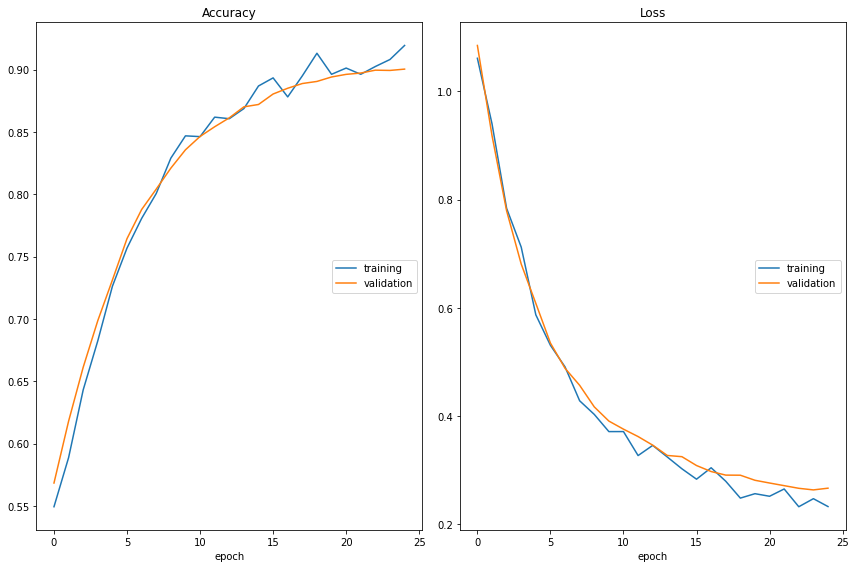

Accuracy
	training         	 (min:    0.549, max:    0.919, cur:    0.919)
	validation       	 (min:    0.568, max:    0.900, cur:    0.900)
Loss
	training         	 (min:    0.232, max:    1.061, cur:    0.233)
	validation       	 (min:    0.263, max:    1.085, cur:    0.266)
25/25 [==============================] - 1314s 53s/step - loss: 0.2325 - acc: 0.9194 - val_loss: 0.2665 - val_acc: 0.9004


In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

EPOCHS = 25
history = model.fit_generator(train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    steps_per_epoch=25,
    callbacks=[checkpoint,PlotLossesCallback()])

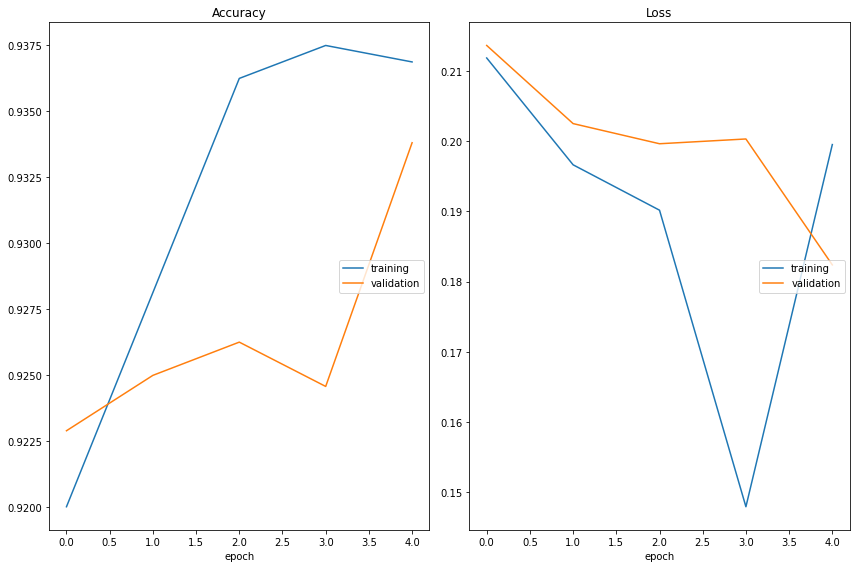

Accuracy
	training         	 (min:    0.920, max:    0.938, cur:    0.937)
	validation       	 (min:    0.923, max:    0.934, cur:    0.934)
Loss
	training         	 (min:    0.148, max:    0.212, cur:    0.200)
	validation       	 (min:    0.182, max:    0.214, cur:    0.182)
25/25 [==============================] - 1675s 67s/step - loss: 0.1995 - acc: 0.9369 - val_loss: 0.1824 - val_acc: 0.9338


In [ ]:


# Обучение модели предсказания пола
base_model.trainable = True
print("Количество слоев в базовой модели: ", len(base_model.layers))
fine_tune_at = 100
# все слои до -- заморозим
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

model.compile(optimizer = tf.keras.optimizers.Adam(lr=1e-5), # уменьшили скорость обучения
              loss='binary_crossentropy',
              metrics=['accuracy'])
EPOCHS = 5
history = model.fit_generator(train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    steps_per_epoch=25,
    callbacks=[checkpoint,PlotLossesCallback()])



In [ ]:
model_gender =tf.keras.models.load_model(cpt_path)
loss, acc = model_gender.evaluate_generator(val_generator)
if acc < 0.9:
    print("Please, try harder!")
else:
    if acc >= 0.94:
        print("Well done!")
    else:
        print("Very good! Can you improve accuracy?")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Very good! Can you improve accuracy?


In [ ]:
def show_faces(images, real_race=None, real_gender=None, real_age=None, 
               predicted_race=None, predicted_gender=None, predicted_age=None):
    plt.figure(figsize=(10,10))
    labels = {"Gender": [predicted_gender, real_gender],
                  "Race": [predicted_race, real_race],
                  "Age": [predicted_age, real_age]}
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(deprocess_image(images[i]))
        real_str = "Real:"
        pred_str = "Pred:"
        correct = True
        for name, (predicted, real) in labels.items():
            if predicted is None:
                continue
            if name == "Age":
                real_age = int(real[i]*int(max_age))
                predicted_age = int(predicted[i]*max_age)
                real_str += f"{real_age}"
                pred_str += f"{predicted_age}"
                if np.abs(predicted_age - real_age) > 6:
                    correct = False

            elif name == "Gender":
                real_gender = int(real[i])
                predicted_gender = int(predicted[i] > 0.5)
                real_str += f"{gender_mapping[real_gender]}, "
                pred_str += f"{gender_mapping[predicted_gender]}, "
                if real_gender != predicted_gender:
                    correct = False
            elif name == "Race":
                real_race = int(real[i])
                predicted_race = np.argmax(predicted[i])
                real_str += f"{race_mapping[real_race]}, "
                pred_str += f"{race_mapping[predicted_race]}, "
                if real_race != predicted_race:
                    correct = False
                
        title_obj = plt.title(f"{real_str}\n{pred_str}")
            
        plt.subplots_adjust(wspace=0.4)
        if not correct:
            plt.setp(title_obj, color='r')

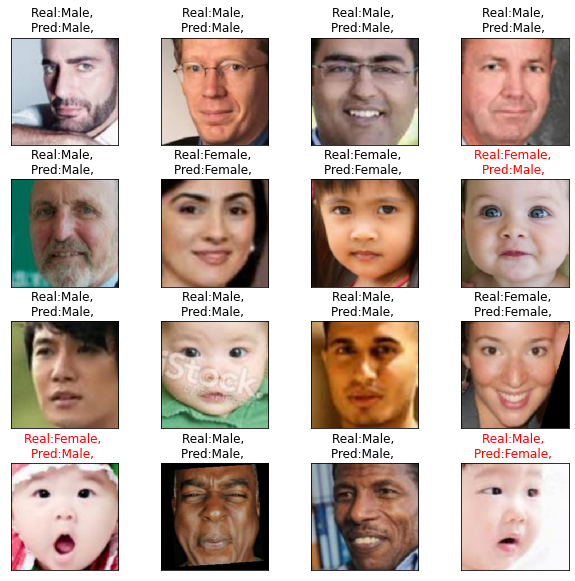

In [ ]:
sample_validation_images, sample_validation_labels = next(val_generator)
predicted = model_gender.predict(sample_validation_images)
show_faces(sample_validation_images, real_gender=sample_validation_labels, predicted_gender=predicted)

**Race prediction model traing**

In [ ]:
vggface_model = load_model("/content/drive/MyDrive/data science/resnet50face.h5")
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = False

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = 224

train_generator = image_gen.flow_from_dataframe(df_train,directory=str(data_folder),
                                                x_col="img_name", y_col="race",
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                batch_size=BATCH_SIZE,shuffle=True,
                                                class_mode='sparse')



val_generator = image_gen.flow_from_dataframe(df_val,directory=str(data_folder),
                                                x_col="img_name", y_col="race",
                                                target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                batch_size=BATCH_SIZE,shuffle=False,
                                                class_mode='sparse')

Found 18946 validated image filenames belonging to 5 classes.
Found 4759 validated image filenames belonging to 5 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = Path("/content/drive/My Drive/model_race")
path.mkdir(exist_ok=True, parents=True) # папка создается на вашем гугл диске. вместе с "родителями"
assert path.exists()
cpt_filename = "checkpoint_best.h5"  
cpt_path =str(path / cpt_filename)

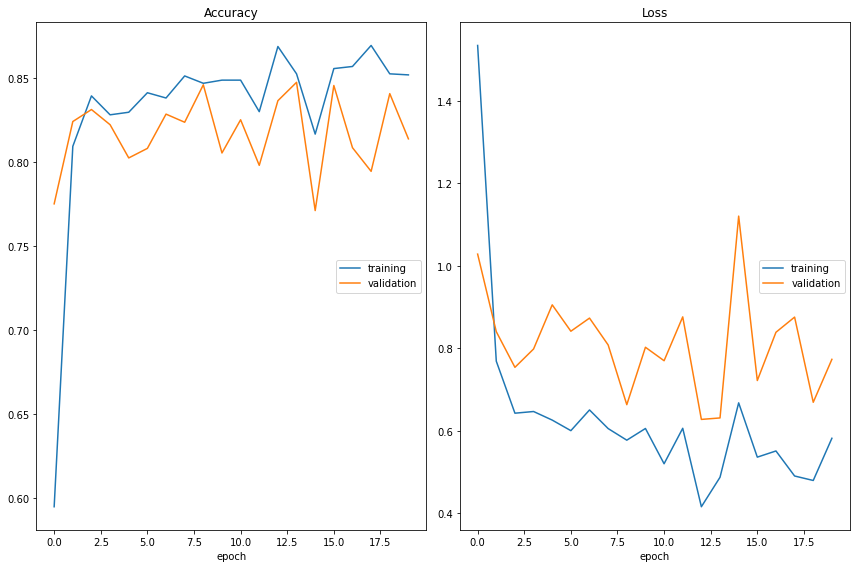

Accuracy
	training         	 (min:    0.595, max:    0.869, cur:    0.852)
	validation       	 (min:    0.771, max:    0.847, cur:    0.814)
Loss
	training         	 (min:    0.416, max:    1.534, cur:    0.582)
	validation       	 (min:    0.628, max:    1.121, cur:    0.773)
25/25 [==============================] - 1324s 53s/step - loss: 0.5820 - acc: 0.8519 - val_loss: 0.7734 - val_acc: 0.8138


In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

EPOCHS = 20
history = model.fit_generator(train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    steps_per_epoch=25,
    callbacks=[checkpoint,PlotLossesCallback()])

In [ ]:
model_race = load_model(cpt_path)
loss, acc = model_race.evaluate_generator(val_generator)
if acc < 0.8:
    print("Please, try harder!")
else:
    if acc >= 0.85:
        print("Well done!")
    else:
        print("Very good! Can you improve accuracy?")

Very good! Can you improve accuracy?


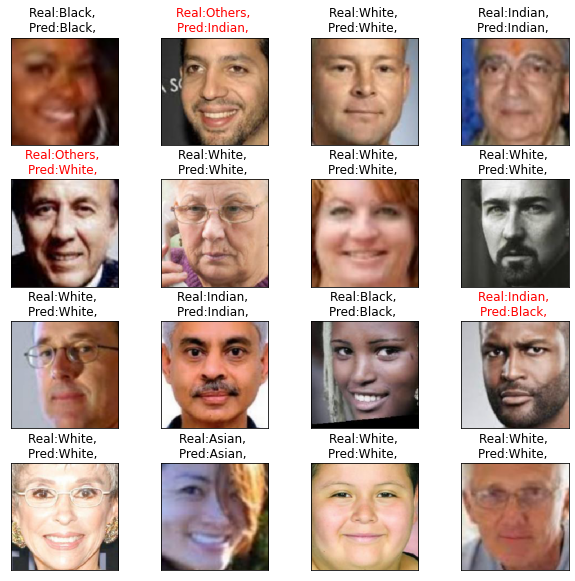

In [ ]:
sample_validation_images, sample_validation_labels = next(val_generator)
predicted = model_race.predict(sample_validation_images)
show_faces(sample_validation_images, real_race=sample_validation_labels, predicted_race=predicted)

In [ ]:
vggface_model = load_model("/content/drive/MyDrive/data science/resnet50face.h5")

In [ ]:
base_model = tf.keras.Model([vggface_model.input], vggface_model.get_layer("flatten_1").output)
base_model.trainable = False

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
model_3 (Model)                 (None, 2048)         23561152    input_2[0][0]                    
__________________________________________________________________________________________________
Layer2 (Dense)                  (None, 514)          1053186     model_3[1][0]                    
__________________________________________________________________________________________________
gender (Dense)                  (None, 1)            515         Layer2[0][0]                     
____________________________________________________________________________________________

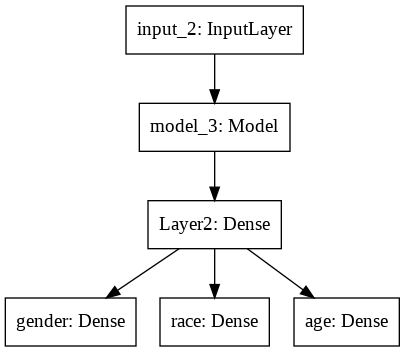

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense

IMAGE_SIZE = 224

input_layer = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# переменная model должна содержать модель для дальнейшего обучения

l1 = base_model # определили первый слой
l1_output = l1(input_layer) # соеденили его с инпутом

l2_output = Dense(514, name="Layer2")(l1_output) 
gender_output=tf.keras.layers.Dense(1, activation='sigmoid',name="gender")(l2_output)
race_output=tf.keras.layers.Dense(5, activation='softmax',name="race")(l2_output)
age_output=tf.keras.layers.Dense(1, activation='sigmoid',name="age")(l2_output)


model = tf.keras.Model(inputs=input_layer, outputs=[gender_output, race_output, age_output])

model.summary()
plot_model(model)

In [ ]:
prediction = model(np.zeros((6, IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32))
assert len(prediction) == 3, "Модель должна возвращать три тензора"
assert prediction[0].shape == (6, 1), f"Неправильный размер выхода gender: {prediction[0].shape}"
assert prediction[1].shape == (6, 5), f"Неправильный размер выхода race: {prediction[1].shape}"
assert prediction[2].shape == (6, 1), f"Неправильный размер выхода age: {prediction[2].shape}"
print("Shape tests passed")

Shape tests passed


In [ ]:
BATCH_SIZE = 64
train_generator = image_gen.flow_from_dataframe(
        dataframe=df_train,
        class_mode="other",
        x_col="img_name", y_col=["gender", "race", "age"], # нас интересуют все три столбца
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
val_generator = image_gen.flow_from_dataframe(
        dataframe=df_val,
        class_mode="other",
        x_col="img_name", y_col=["gender", "race", "age"], 
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
def split_outputs(generator):
    while True:
        data = next(generator)
        image = data[0]
        labels = np.split(data[1], 3, axis=1)
        yield image, labels

Found 18946 validated image filenames.
Found 4759 validated image filenames.


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, 
              loss={'gender': 'binary_crossentropy', 'race': 'sparse_categorical_crossentropy', 'age': 'mse'},
              metrics={'gender': 'accuracy', 'race': 'accuracy', 'age': 'mae'})


path = Path("/content/drive/My Drive/model_multitask")
path.mkdir(exist_ok=True, parents=True) 
assert path.exists()
cpt_filename = "checkpoint_best.h5"  
cpt_path =str(path / cpt_filename)

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_age_mean_absolute_error', verbose=1, save_best_only=True, mode='min')

model.fit_generator(split_outputs(train_generator), epochs=15, validation_data=split_outputs(val_generator),
                    callbacks=[ checkpoint,PlotLossesCallback()], steps_per_epoch=50, 
                    validation_steps= len(df_val) // BATCH_SIZE)

NameError: ignored

In [ ]:
model_multitask = load_model(cpt_path)
val_generator = image_gen.flow_from_dataframe(
        dataframe=df_val,
        class_mode="other",
        x_col="img_name", y_col=["gender", "race", "age"], 
        directory=str(data_folder),
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True)
results = model.evaluate(split_outputs(val_generator), steps=len(df_val)//BATCH_SIZE)
assert results[-3] > 0.90, f"Gender accuracy is too low. Please try to improve it {results[-3]}"
assert results[-2] > 0.80, f"Race accuracy is too low. Please try to improve it. {results[-2]}"
assert results[-1] < 0.09, f"Age MAE it too high: {results[-1]}"

In [ ]:
sample_validation_images, sample_validation_labels = next(split_outputs(val_generator))
predicted = model_multitask.predict(sample_validation_images)
show_faces(sample_validation_images, 
           real_gender=sample_validation_labels[0], predicted_gender=predicted[0],
           real_race=sample_validation_labels[1], predicted_race=predicted[1],
           real_age=sample_validation_labels[2].flatten(), predicted_age=predicted[2].flatten(),
           )

In [ ]:
url = 'https://drive.google.com/uc?id=1ZZgwwVxSjWG6gJT2uV2vt54QsLJcU07-'
output = 'me.jpg'
gdown.download(url, output, quiet=False)

img = image.load_img("me.jpg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=2) 
predicted_labels = model.predict(x)
plt.imshow(img)
gender, race, age = int(predicted_labels[0][0] > 0.5), np.argmax(predicted_labels[1][0]), predicted_labels[2][0]
title_obj = f"Pred: {gender_mapping[gender]}, {race_mapping[race]}, {int(age[0]*max_age)}."
_ = plt.title(title_obj)